In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("x_under_cvd_death.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,...,0,0,0,1,0,0,0,1,1,0
1,1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,...,0,1,1,0,0,0,0,1,1,0
2,2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,...,0,1,0,1,0,0,0,1,1,0
3,3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,...,0,0,1,0,0,0,0,1,0,1
4,4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,...,0,1,0,1,0,0,0,1,0,1
932,932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,...,0,0,0,1,0,0,0,1,0,1
933,933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,...,0,0,0,1,0,1,0,0,0,1
934,934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,...,0,1,0,1,0,0,0,1,1,0


In [4]:
data_pw_crf = data_x.iloc[:, 1:65]

In [5]:
data_pw_crf.head()

,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,t_p2in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,0.14571,...,0,0,0,1,0,0,0,1,1,0
1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,0.18072,...,0,1,1,0,0,0,0,1,1,0
2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,0.23023,...,0,1,0,1,0,0,0,1,1,0
3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,0.15000,...,0,0,1,0,0,0,0,1,0,1
4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,0.16364,...,0,0,1,0,0,0,0,1,1,0


In [6]:
data_pw_crf.columns

Index(['T', 'delta_t', 'CT', 'prop_s', 't_sys', 't_dia', 't_ratio',
       'prop_delta_t', 't_p1in_dia', 't_p2in_dia', 't_b_c', 't_b_d',
       'pulse_amp', 'pulse_amp_p1', 'pulse_amp_p2', 'AP', 'AI', 'dia_amp',
       'RI', 'RI_p1', 'RI_p2', 'ratio_p2_p1', 'A1', 'A2', 'IPA', 'ms',
       'ms_div_amp', 'b_div_a', 'c_div_a', 'd_div_a', 'e_div_a', 'a_div_amp',
       'b_div_amp', 'c_div_amp', 'd_div_amp', 'e_div_amp', 'AGI', 'AGI_inf',
       'AGI_mod', 'slope_b_c', 'slope_b_d', 'IPAD', 'k', 'CT_div_ht', 'SI',
       'Age when attended assessment centre', 'mean sbp', 'BMI',
       'cholesterol HDL ratio', 'Diabetes diagnosed by doctor_No',
       'Diabetes diagnosed by doctor_Prefer not to answer',
       'Diabetes diagnosed by doctor_Yes', 'Smoking status_Current',
       'Smoking status_Never', 'Smoking status_Prefer not to answer',
       'Smoking status_Previous', 'Sex_Female', 'Sex_Male',
       'Ethnic background_Asian', 'Ethnic background_Black',
       'Ethnic background_other in

In [7]:
data_pw_crf_omit_bp = data_pw_crf.drop(['mean sbp', 'bp medication_0.0', 'bp medication_1.0'], axis=1)

In [8]:
data_pw_crf_omit_bp

,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,t_p2in_dia,...,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded
0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,0.14571,...,0,1,0,0,0,1,0,0,0,1
1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,0.18072,...,0,0,0,1,1,0,0,0,0,1
2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,0.23023,...,0,0,0,1,0,1,0,0,0,1
3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,0.15000,...,0,1,0,0,1,0,0,0,0,1
4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,0.16364,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,0.20000,...,0,0,0,1,0,1,0,0,0,1
932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,0.12500,...,0,1,0,0,0,1,0,0,0,1
933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,0.15405,...,0,1,0,0,0,1,0,1,0,0
934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,0.17273,...,0,0,0,1,0,1,0,0,0,1


In [9]:
data_pw_crf_omit_bp.columns

Index(['T', 'delta_t', 'CT', 'prop_s', 't_sys', 't_dia', 't_ratio',
       'prop_delta_t', 't_p1in_dia', 't_p2in_dia', 't_b_c', 't_b_d',
       'pulse_amp', 'pulse_amp_p1', 'pulse_amp_p2', 'AP', 'AI', 'dia_amp',
       'RI', 'RI_p1', 'RI_p2', 'ratio_p2_p1', 'A1', 'A2', 'IPA', 'ms',
       'ms_div_amp', 'b_div_a', 'c_div_a', 'd_div_a', 'e_div_a', 'a_div_amp',
       'b_div_amp', 'c_div_amp', 'd_div_amp', 'e_div_amp', 'AGI', 'AGI_inf',
       'AGI_mod', 'slope_b_c', 'slope_b_d', 'IPAD', 'k', 'CT_div_ht', 'SI',
       'Age when attended assessment centre', 'BMI', 'cholesterol HDL ratio',
       'Diabetes diagnosed by doctor_No',
       'Diabetes diagnosed by doctor_Prefer not to answer',
       'Diabetes diagnosed by doctor_Yes', 'Smoking status_Current',
       'Smoking status_Never', 'Smoking status_Prefer not to answer',
       'Smoking status_Previous', 'Sex_Female', 'Sex_Male',
       'Ethnic background_Asian', 'Ethnic background_Black',
       'Ethnic background_other including mixe

In [10]:
data_pw_crf_omit_bp.shape

(936, 61)

In [11]:
data_pw_crf_omit_bp.size

57096

In [12]:
X = data_pw_crf_omit_bp.values

In [13]:
X.size

57096

In [14]:
X.shape

(936, 61)

In [15]:
# reading the output variable

In [16]:
data_y = pd.read_csv("y_under_cvd_death.csv")

In [17]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [18]:
y = data_y.values

In [20]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [21]:
y.shape

(936, 1)

In [22]:
y.size

936

In [23]:
# nested cv

In [24]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.7513664305159243
[[0.53547424 0.46452576]
 [0.2958845  0.7041155 ]
 [0.87251896 0.12748104]
 [0.9269214  0.07307857]
 [0.2612242  0.7387758 ]
 [0.84398305 0.15601698]
 [0.5938555  0.40614447]
 [0.6101006  0.38989934]
 [0.38990515 0.61009485]
 [0.8159427  0.1840573 ]
 [0.72217804 0.27782196]
 [0.1663869  0.8336131 ]
 [0.5596101  0.44038987]
 [0.9339946  0.06600541]
 [0.5607414  0.43925858]
 [0.6507826  0.34921739]
 [0.4966079  0.5033921 ]
 [0.12320536 0.87679464]
 [0.6021144  0.39788562]
 [0.70571005 0.29428998]
 [0.6652731  0.33472693]
 [0.90717435 0.09282567]
 [0.7109585  0.28904155]
 [0.4797353  0.5202647 ]
 [0.25856847 0.74143153]
 [0.36236697 0.637633  ]
 [0.83346677 0.16653326]
 [0.613001   0.38699904]
 [0.6537678  0.34623215]
 [0.27942562 0.7205744 ]
 [0.3242417  0.6757583 ]
 [0.55390114 0.44609886]
 [0.72329044 0.27670953]
 [0.8766473  0.12335268]
 [0.43692148 0.5630785 ]
 [0.452851   0.547149  ]
 [0.5282537  0.47174633]
 [0.72149014 0.27850986]
 [0.794925

best auc score is : 
0.7542442901097357
[[0.37736344 0.62263656]
 [0.5606073  0.43939272]
 [0.5969674  0.4030326 ]
 [0.7472364  0.25276363]
 [0.75496364 0.24503636]
 [0.52461886 0.47538114]
 [0.47520816 0.52479184]
 [0.7013732  0.29862678]
 [0.6209714  0.37902862]
 [0.80726093 0.19273907]
 [0.4889148  0.5110852 ]
 [0.33664042 0.6633596 ]
 [0.34697813 0.6530219 ]
 [0.8499956  0.15000439]
 [0.46873063 0.5312694 ]
 [0.545477   0.45452303]
 [0.82555    0.17444998]
 [0.3308562  0.6691438 ]
 [0.6052846  0.3947154 ]
 [0.58990264 0.4100974 ]
 [0.44645005 0.55354995]
 [0.6472738  0.3527262 ]
 [0.47605896 0.52394104]
 [0.49575633 0.5042437 ]
 [0.70111203 0.29888797]
 [0.71781456 0.2821854 ]
 [0.82401955 0.17598046]
 [0.6356998  0.3643002 ]
 [0.72767127 0.27232873]
 [0.63474363 0.36525637]
 [0.46644408 0.5335559 ]
 [0.6223496  0.37765038]
 [0.711928   0.28807202]
 [0.72490615 0.27509385]
 [0.6098038  0.39019623]
 [0.58841264 0.41158733]
 [0.46856904 0.53143096]
 [0.7727684  0.22723162]
 [0.572626

best auc score is : 
0.723751914785938
[[0.4653495  0.5346505 ]
 [0.9415319  0.05846811]
 [0.53753567 0.46246436]
 [0.2952472  0.7047528 ]
 [0.6076449  0.39235508]
 [0.23115301 0.768847  ]
 [0.38652086 0.61347914]
 [0.23268509 0.7673149 ]
 [0.6887502  0.3112498 ]
 [0.679582   0.32041797]
 [0.90056074 0.09943927]
 [0.98713183 0.01286819]
 [0.38571316 0.61428684]
 [0.43767273 0.56232727]
 [0.98402894 0.01597106]
 [0.22199708 0.7780029 ]
 [0.61673605 0.38326392]
 [0.9350423  0.06495768]
 [0.21776992 0.7822301 ]
 [0.69280094 0.30719906]
 [0.9029044  0.09709564]
 [0.44547743 0.5545226 ]
 [0.68759465 0.31240538]
 [0.58295417 0.4170458 ]
 [0.61588347 0.38411656]
 [0.7017553  0.29824468]
 [0.9087143  0.09128568]
 [0.9238217  0.0761783 ]
 [0.5825548  0.41744518]
 [0.7586727  0.24132729]
 [0.33461726 0.66538274]
 [0.6376928  0.36230722]
 [0.47353214 0.52646786]
 [0.9336448  0.0663552 ]
 [0.7075     0.2925    ]
 [0.78899276 0.21100722]
 [0.3380627  0.6619373 ]
 [0.8726309  0.1273691 ]
 [0.6716203

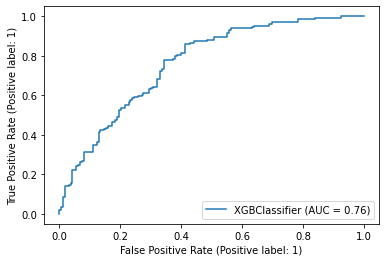

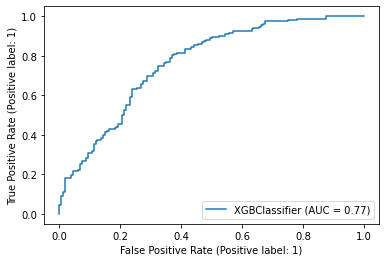

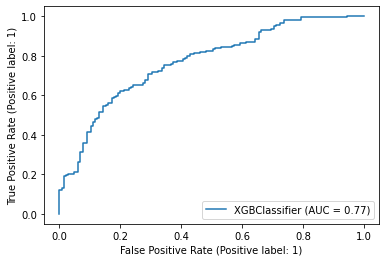

In [25]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [26]:
best_auc

[0.7513664305159243, 0.7542442901097357, 0.723751914785938]

In [27]:
round(mean(best_auc),2)

0.74

In [28]:
len(feature_imp[0])

61

In [29]:
feature_imp

[array([0.01322817, 0.01188737, 0.01788445, 0.02792112, 0.01313225,
        0.01224949, 0.01412975, 0.0224994 , 0.01162747, 0.01042748,
        0.0089479 , 0.02063452, 0.        , 0.01480583, 0.00702424,
        0.00947955, 0.00702353, 0.01332193, 0.0114524 , 0.01916842,
        0.01946522, 0.01736457, 0.01494366, 0.01165614, 0.01764188,
        0.01435055, 0.01419138, 0.01802702, 0.02617203, 0.01618445,
        0.0158382 , 0.01229211, 0.02060949, 0.02268194, 0.01258927,
        0.01482554, 0.01963972, 0.01796575, 0.02483411, 0.01043078,
        0.0189719 , 0.01848359, 0.01326819, 0.01697426, 0.00819934,
        0.04341524, 0.02242555, 0.01382802, 0.02922496, 0.        ,
        0.03193868, 0.02802121, 0.02516902, 0.        , 0.0084046 ,
        0.04893215, 0.05426865, 0.        , 0.        , 0.00992558,
        0.        ], dtype=float32),
 array([0.01554498, 0.01345822, 0.01453632, 0.00703792, 0.00582901,
        0.00995396, 0.01999057, 0.00901712, 0.01031327, 0.01373332,
        0.0

In [30]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [31]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [32]:
df_final_FI

,first,second,third
0,0.013228,0.015545,0.008950
1,0.011887,0.013458,0.010005
2,0.017884,0.014536,0.019657
3,0.027921,0.007038,0.011943
4,0.013132,0.005829,0.011592
...,...,...,...
56,0.054269,0.039539,0.076105
57,0.000000,0.000000,0.000000
58,0.000000,0.000000,0.000000
59,0.009926,0.000000,0.000000


In [33]:
df_final_FI.to_csv("FI_values_cvd_death_crf_plus_pw_omitting_bp.csv")

In [34]:
# pred prob

In [35]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [36]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [37]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.535474,0.464526,0.377363,0.622637,0.465349,0.534651
1,0.295884,0.704116,0.560607,0.439393,0.941532,0.058468
2,0.872519,0.127481,0.596967,0.403033,0.537536,0.462464
3,0.926921,0.073079,0.747236,0.252764,0.295247,0.704753
4,0.261224,0.738776,0.754964,0.245036,0.607645,0.392355
...,...,...,...,...,...,...
307,0.634189,0.365811,0.464576,0.535424,0.368925,0.631075
308,0.241430,0.758570,0.257396,0.742604,0.354272,0.645728
309,0.153413,0.846587,0.638297,0.361703,0.192384,0.807616
310,0.137281,0.862719,0.332377,0.667623,0.198880,0.801120


In [38]:
df_final_pred.to_csv("prob_values_cvd_death_crf_pw_omitting_bp.csv")

In [39]:
# sensitivity and specificity

In [40]:
# sensitivity for class '0' which is also specificity

In [41]:
sensitivity_class_zero = [0.66, 0.70, 0.71]

In [42]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.69


In [43]:
# sensitivity for class one

In [44]:
sensitivity_class_one = [0.73, 0.70, 0.69 ]

In [45]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.71


In [1]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.76, 0.77, 0.77]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.77
